# Housing Price Prediction - Machine Learning Project

This project predicts house prices using Linear Regression.
Each row represents one house.
Target variable: Price
Problem Type: Regression

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
df = pd.read_csv("Housing.csv")   # change name if different
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [6]:
X = df.drop("price", axis=1)   # Features
y = df["price"]                # Target

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

Feature shape: (545, 13)
Label shape: (545,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (436, 13)
Testing data: (109, 13)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 970043.4039201636
MSE: 1754318687330.6638
R2 Score: 0.6529242642153184


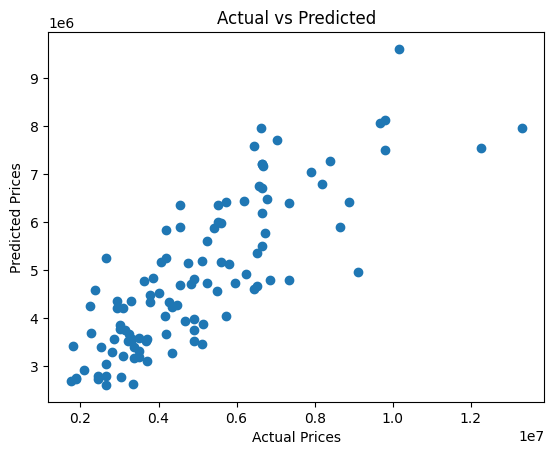

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()